In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sp

In [3]:
data=pd.read_csv('data.csv',  index_col=0)
X=data.iloc[:,:5]
Y=data.iloc[:,5:6]
print (data.head(5))

        X1      X2      X3      X4      X5        Y
0   87.251  126.14  237.10  307.51  370.27  17097.0
1   88.363  163.05  276.54  327.71  375.85  17904.0
2   66.277  163.95  251.39  307.63  425.08  13164.0
3  126.160  160.26  305.48  299.60  374.06  29588.0
5  129.800  158.80  290.26  355.78  387.44  31344.0


In [53]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
res = est.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1615.
Date:                Wed, 23 Oct 2019   Prob (F-statistic):          3.90e-204
Time:                        23:32:06   Log-Likelihood:                -2435.5
No. Observations:                 286   AIC:                             4883.
Df Residuals:                     280   BIC:                             4905.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.147e+04   1563.626     -7.335      0.0

In [54]:
#Removing X2
data=pd.read_csv('data.csv',  index_col=0)
X=data.iloc[:,:5]
Y=data.iloc[:,5:6]
del X['X2']

In [55]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
res = est.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2002.
Date:                Wed, 23 Oct 2019   Prob (F-statistic):          4.26e-205
Time:                        23:32:07   Log-Likelihood:                -2437.2
No. Observations:                 286   AIC:                             4884.
Df Residuals:                     281   BIC:                             4903.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.092e+04   1540.671     -7.088      0.0

Variance :  1477124.0118501198


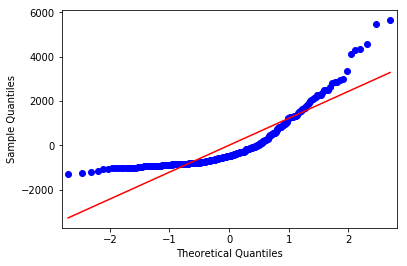

In [56]:
resi = res.resid 
print ("Variance : ", np.var(resi))
fig = sm.qqplot(resi, line='s')
plt.show()

(array([-1297.4342941 ,  -603.89968445,    89.6349252 ,   783.16953484,
         1476.70414449,  2170.23875414,  2863.77336378,  3557.30797343]),
 array([122.,  79.,  27.,  23.,  14.,  10.,   5.]))

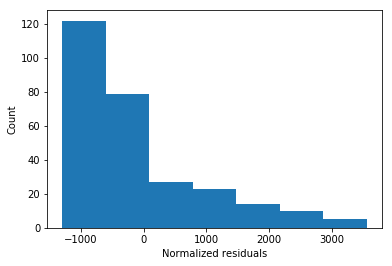

In [57]:
freq,bins,_=plt.hist(res.resid, bins=[-1297.4342941 ,  -603.89968445,    89.6349252 ,   783.16953484,
        1476.70414449,  2170.23875414,  2863.77336378,  3557.30797343])
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
bins, freq

In [58]:
a1, b1 = sp.stats.norm.fit(resi)

scaling_factor = 286*(resi.max()-resi.min())/7
x_middle = 0.5*(bins[1:] + bins[:-1])
expected_values = scaling_factor*sp.stats.norm.pdf(x_middle,a1,b1)
chi,_=sp.stats.chisquare(freq,expected_values,ddof=2)
chi

118.45226132956992

In [59]:
cdf = stats.norm.cdf(bins, a1, b1)
expected_values = 286 * np.diff(cdf)
chi,_=sp.stats.chisquare(freq,expected_values,ddof=2)
chi

153.9456289686817

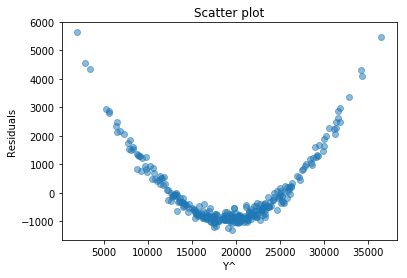

In [60]:
pred = res.predict()
# Plot
plt.scatter(pred, resi,  alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Y^')
plt.ylabel('Residuals')
plt.show()